In [3]:
# pip3 install pandas numpy matplotlib seaborn scikit-learn joblib

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import joblib

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, silhouette_score, davies_bouldin_score, classification_report
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import LabelEncoder

from sklearn.cluster import KMeans

# Preparing Dataset

In [5]:
df = pd.read_csv("dataGaia2.csv")
print(df.head())

   Unnamed: 0    RA_ICRS    DE_ICRS             Source  e_RA_ICRS  e_DE_ICRS  \
0           0  44.589012   2.195298   1306361548360576     0.0655     0.0612   
1           1  35.358035   8.988813  23700286669971584     0.0658     0.0717   
2           2  44.450767  10.079118  27109837867995776     0.0627     0.0517   
3           3  48.404909  15.105912  31009771252186752     0.0500     0.0421   
4           4  57.092838  11.550927  36876009385300352     0.0521     0.0335   

      Plx   e_Plx     PM   pmRA  ...   Lum-Flame  Mass-Flame  Age-Flame  \
0  0.2384  0.0769  2.901  2.088  ...  298.485140         NaN        NaN   
1  0.1666  0.0785  4.402 -0.242  ...  292.672100         NaN        NaN   
2  0.3544  0.0727  3.154  2.722  ...  506.732800         NaN        NaN   
3  0.5962  0.0557  2.745  2.460  ...    9.055018         NaN        NaN   
4  0.4507  0.0575  4.918 -2.851  ...  311.502840         NaN        NaN   

    z-Flame  Evol  SpType-ELS  Flags-HS     EWHa   e_EWHa  f_EWHa  


In [6]:
df.describe()

,Unnamed: 0,RA_ICRS,DE_ICRS,Source,e_RA_ICRS,e_DE_ICRS,Plx,e_Plx,PM,pmRA,...,Rad-Flame,Lum-Flame,Mass-Flame,Age-Flame,z-Flame,Evol,Flags-HS,EWHa,e_EWHa,f_EWHa
count,626016.000000,626016.000000,626016.000000,6.260160e+05,626016.000000,626016.000000,626016.000000,626016.000000,626016.000000,626016.000000,...,611293.000000,611293.000000,590796.000000,544681.000000,611293.000000,590797.000000,626016.000000,626016.000000,626016.000000,626016.000000
mean,48462.184864,114.461886,27.758130,1.034965e+18,0.026891,0.022999,1.466432,0.033111,11.114728,1.332241,...,6.850684,114.628554,1.841872,3.776435,0.445233,364.190439,126.373796,0.158441,0.037198,0.211773
std,29249.820619,103.594052,26.724066,1.373944e+18,0.032805,0.029426,2.015173,0.040997,19.287210,15.950555,...,17.021461,330.115307,1.004918,4.139873,0.233019,238.863381,208.529314,0.227429,0.040021,0.408565
min,0.000000,0.000205,-89.098460,3.865554e+10,0.004400,0.004900,-5.014100,0.008000,0.002000,-584.663000,...,0.046300,0.034732,0.500000,0.200000,0.001505,100.000000,1.000000,-6.651180,0.005400,0.000000
25%,22357.000000,47.123816,18.999283,1.429009e+17,0.014900,0.012300,0.313100,0.018200,2.486000,-2.380000,...,1.343500,2.066952,1.041000,0.524000,0.313836,216.000000,91.000000,0.045490,0.018830,0.000000
50%,47831.500000,68.112694,31.444374,2.277695e+17,0.019600,0.015900,0.850400,0.023600,5.508000,0.059000,...,2.017800,11.679550,1.649000,1.448000,0.480814,286.000000,93.000000,0.147890,0.027910,0.000000
75%,73915.250000,122.131857,43.771117,1.963946e+18,0.026600,0.022100,1.633600,0.032000,10.857000,3.162000,...,3.695100,60.254990,2.462000,6.629000,0.570397,457.000000,94.000000,0.301950,0.039490,0.000000
max,99999.000000,359.998280,89.774031,6.916186e+18,0.801800,0.718500,95.047700,1.056500,688.189000,606.357000,...,181.063300,3499.921000,7.521000,13.500000,1.616032,1735.000000,999.000000,1.883830,3.296320,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626016 entries, 0 to 626015
Data columns (total 50 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  626016 non-null  int64  
 1   RA_ICRS     626016 non-null  float64
 2   DE_ICRS     626016 non-null  float64
 3   Source      626016 non-null  int64  
 4   e_RA_ICRS   626016 non-null  float64
 5   e_DE_ICRS   626016 non-null  float64
 6   Plx         626016 non-null  float64
 7   e_Plx       626016 non-null  float64
 8   PM          626016 non-null  float64
 9   pmRA        626016 non-null  float64
 10  e_pmRA      626016 non-null  float64
 11  pmDE        626016 non-null  float64
 12  e_pmDE      626016 non-null  float64
 13  RUWE        626016 non-null  float64
 14  Gmag        626015 non-null  float64
 15  e_Gmag      626015 non-null  float64
 16  BPmag       626015 non-null  float64
 17  e_BPmag     626015 non-null  float64
 18  RPmag       626016 non-null  float64
 19  e_

In [8]:
df.shape

(626016, 50)

# Encoding Data

In [9]:
miss_values = df.isnull().sum()
miss_perc = (miss_values / len(df) ) * 100
miss_df = pd.DataFrame({'Missing Values': miss_values, 'Missing Percentages': miss_perc})
print(miss_df[miss_df['Missing Values'] > 0])

            Missing Values  Missing Percentages
Gmag                     1             0.000160
e_Gmag                   1             0.000160
BPmag                    1             0.000160
e_BPmag                  1             0.000160
GRVSmag             116307            18.578918
e_GRVSmag           116307            18.578918
RV                  115668            18.476844
Rad-Flame            14723             2.351857
Lum-Flame            14723             2.351857
Mass-Flame           35220             5.626054
Age-Flame            81335            12.992479
z-Flame              14723             2.351857
Evol                 35219             5.625895


In [10]:
rows_before = df.shape[0]
df = df.dropna(subset=['e_BPmag', 'BPmag', 'e_Gmag', 'Gmag', 'Rad-Flame', 'Lum-Flame', 'Mass-Flame', 'z-Flame', 'Evol'])
rows_after = df.shape[0]
print(f"Number of rows dropped: {rows_before - rows_after}")
print(f"Percentage of rows dropped: {100*(rows_before-rows_after)/(rows_after+rows_before)}%")


Number of rows dropped: 35221
Percentage of rows dropped: 2.8945333334429093%


In [11]:
null_cols = ["GRVSmag", "e_GRVSmag", "RV", "Age-Flame"]
null_df = df[null_cols]
null_df = null_df.fillna(null_df.median())

In [12]:
miss_values = df.isnull().sum()
miss_perc = (miss_values / len(df) ) * 100
miss_df = pd.DataFrame({'Missing Values': miss_values, 'Missing Percentages': miss_perc})
print(miss_df[miss_df['Missing Values'] > 0])

           Missing Values  Missing Percentages
GRVSmag             81913            13.864877
e_GRVSmag           81913            13.864877
RV                  81407            13.779230
Age-Flame           46115             7.805584


In [13]:
duplicated_df = df.duplicated().sum()
print(duplicated_df)

0


In [14]:
rows_before = df.shape[0]
df = df.dropna(subset=['GRVSmag', 'e_GRVSmag', 'RV', 'Age-Flame'])
rows_after = df.shape[0]
print(f"Number of rows dropped: {rows_before - rows_after}")
print(f"Percentage of rows dropped: {100*(rows_before-rows_after)/(rows_after+rows_before)}%")


Number of rows dropped: 86099
Percentage of rows dropped: 7.859398205918625%


In [15]:
miss_values = df.isnull().sum()
miss_perc = (miss_values / len(df) ) * 100
miss_df = pd.DataFrame({'Missing Values': miss_values, 'Missing Percentages': miss_perc})
print(miss_df[miss_df['Missing Values'] > 0])

Empty DataFrame
Columns: [Missing Values, Missing Percentages]
Index: []


In [16]:
# new df shape
df.shape

(504696, 50)

In [17]:
df_cols = df.columns.tolist()
print(df_cols)

['Unnamed: 0', 'RA_ICRS', 'DE_ICRS', 'Source', 'e_RA_ICRS', 'e_DE_ICRS', 'Plx', 'e_Plx', 'PM', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'RUWE', 'Gmag', 'e_Gmag', 'BPmag', 'e_BPmag', 'RPmag', 'e_RPmag', 'GRVSmag', 'e_GRVSmag', 'RV', 'logg', '[Fe/H]', 'Dist', 'PQSO', 'PGal', 'Pstar', 'PWD', 'Pbin', 'Teff', 'A0', 'AG', 'ABP', 'ARP', 'E(BP-RP)', 'GMAG', 'Rad', 'Rad-Flame', 'Lum-Flame', 'Mass-Flame', 'Age-Flame', 'z-Flame', 'Evol', 'SpType-ELS', 'Flags-HS', 'EWHa', 'e_EWHa', 'f_EWHa']


In [18]:
df_dtypes = df.dtypes

numerical_cols = df_dtypes[df_dtypes.apply(lambda x: np.issubdtype(x, np.number))].index.tolist()
categorical_cols = df_dtypes[~df_dtypes.apply(lambda x: np.issubdtype(x, np.number))].index.tolist()

numerical_df = df[numerical_cols]
categorical_df = df[categorical_cols]

sorted_cols = set(numerical_cols + categorical_cols)

print(f"Numerical Columns: {len(numerical_cols)}, Categorical Columns: {len(categorical_cols)}")
print(f"Total Categorised Columns: {len(sorted_cols)}")
print(f"Number of missing columns in categorised dataframes: {len(set(df.columns)) - len(sorted_cols)}")

Numerical Columns: 49, Categorical Columns: 1
Total Categorised Columns: 50
Number of missing columns in categorised dataframes: 0


In [19]:
print(categorical_cols)
unique_values = df[categorical_cols].stack().unique()
print(unique_values)

['SpType-ELS']
['B      ' 'A      ' 'F      ' 'G      ' 'K      ' 'M      ']


In [20]:
# data_a = pd.get_dummies(df["SpType-ELS"], dtype=int, drop_first=True)
# data_b = df.drop(columns=["SpType-ELS"])

# df = pd.concat([data_a, data_b], axis=1)

In [21]:
df = df.drop(columns=['Source'])

In [22]:
df_dtypes = df.dtypes

numerical_cols = df_dtypes[df_dtypes.apply(lambda x: np.issubdtype(x, np.number))].index.tolist()
categorical_cols = df_dtypes[~df_dtypes.apply(lambda x: np.issubdtype(x, np.number))].index.tolist()

numerical_df = df[numerical_cols]
categorical_df = df[categorical_cols]

sorted_cols = set(numerical_cols + categorical_cols)

print(f"Numerical Columns: {len(numerical_cols)}, Categorical Columns: {len(categorical_cols)}")
print(f"Total Categorised Columns: {len(sorted_cols)}")
print(f"Number of missing columns in categorised dataframes: {len(set(df.columns)) - len(sorted_cols)}")

Numerical Columns: 48, Categorical Columns: 1
Total Categorised Columns: 49
Number of missing columns in categorised dataframes: 0


# Plots

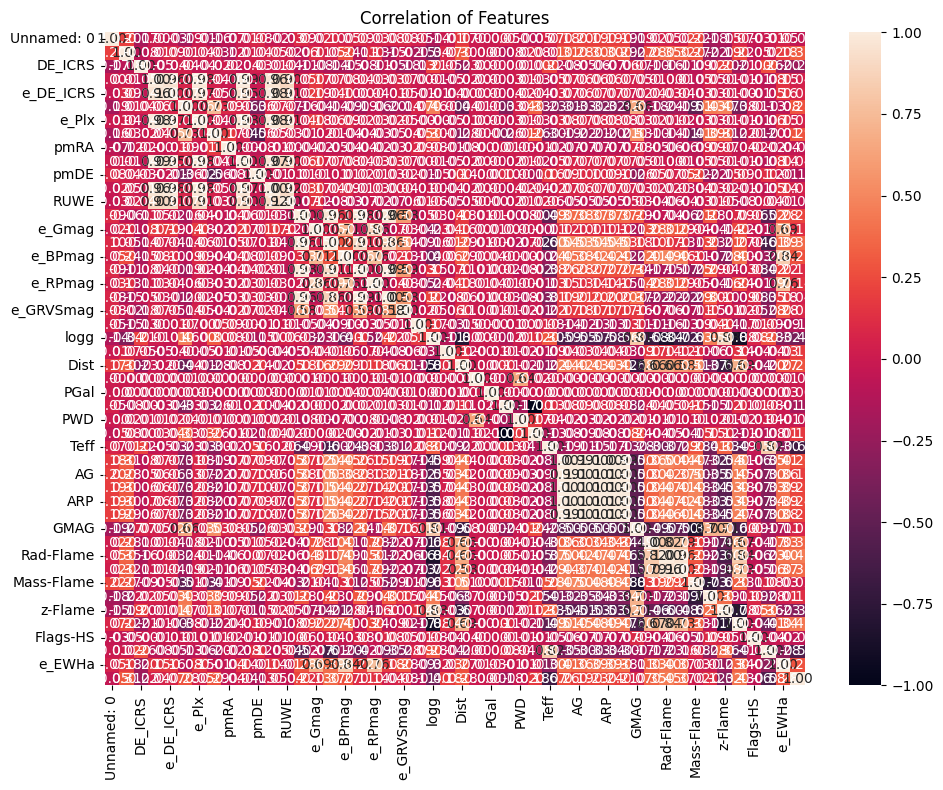

In [23]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.title("Correlation of Features")
plt.tight_layout()
plt.show()

# Models

In [24]:
x = df[numerical_cols]
y = df["SpType-ELS"]

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train_scaled, x_test_scaled, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [25]:
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train_scaled, y_train)
y_pred = lr.predict(x_test_scaled)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

Accuracy:  0.9014959381810976
Confusion Matrix: 
 [[19663    63   116    91     1     8]
 [  157   828     0     0     0     0]
 [  222     3 17128  2708    83     4]
 [    3     0  2757 15611  1317    50]
 [    2     0    76  1616 18086   225]
 [   14     0    14   131   282 19681]]


# Creating sub-sets of data

Spectral Class is identified by the column "SpType-ELS", user would need to input temperature "teff" and luminosity "Lum-Flame". Luminosity Class can be determined from mass "Mass-Flame", radius "Rad", and absolute magnitude "GMAG", which could be calculated using: distance in parsecs "Dist", and apparent magnitude "Gmag".

Model must be trained only on those features, assuming user calculates absolute magnitude themselves - if not, we could create a calculator that does this for them.

In [26]:
# Spectral Class Model

raw = df.copy()

reduced_cols_sc = ['Teff', 'Lum-Flame', 'SpType-ELS', 'Mass-Flame', 'Rad', 'GMAG']
df_reduced_sc = df[reduced_cols_sc]

x = df_reduced_sc.drop(columns=['SpType-ELS'])
y = df["SpType-ELS"]

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [27]:
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

Accuracy:  0.7899247077471765
Confusion Matrix: 
 [[18876   124   789   105    46     2]
 [  305   680     0     0     0     0]
 [ 1089     3 13910  5067    78     1]
 [  144     0  3630 14647  1281    36]
 [  126     0   142  2738 14926  2073]
 [  206     5    44   457  2714 16696]]


In [28]:
print(df["SpType-ELS"].unique())

['B      ' 'A      ' 'F      ' 'G      ' 'K      ' 'M      ']


In [29]:
lr.coef_

array([[  7.34313941,  -4.46200884,  -1.98051545,  -6.675588  ,
         -3.27927028],
       [ 15.42123427,  -5.16838081,  -2.39233845,   1.20040848,
         -6.14672533],
       [  0.98525252,  -3.74767039,  -1.50868392, -16.45620286,
         -0.79405878],
       [ -3.39644512,   4.56867827,   0.16437327,   5.69980465,
          2.60147599],
       [ -9.33422289,   2.78838526,   2.57651363,   6.41904034,
          2.89207663],
       [-11.0189582 ,   6.02099651,   3.14065093,   9.81253738,
          4.72650177]])

In [30]:
# Luminosity class unsupervised learning clusterring

reduced_cols_lm = ['Teff', 'Lum-Flame', 'Mass-Flame', 'Rad', 'GMAG', 'SpType-ELS']
df_reduced_lm = df[reduced_cols_lm]

# Creating dataframes for each spectral class

df_B = df_reduced_lm[df_reduced_lm["SpType-ELS"] == 'B      ']
df_A = df_reduced_lm[df_reduced_lm["SpType-ELS"] == 'A      ']
df_F = df_reduced_lm[df_reduced_lm["SpType-ELS"] == 'F      ']
df_G = df_reduced_lm[df_reduced_lm["SpType-ELS"] == 'G      ']
df_K = df_reduced_lm[df_reduced_lm["SpType-ELS"] == 'K      ']
df_M = df_reduced_lm[df_reduced_lm["SpType-ELS"] == 'M      ']

missing_sp_rows = df.shape[0] - (df_B.shape[0] + df_A.shape[0] + df_F.shape[0] + df_G.shape[0] + df_K.shape[0] + df_M.shape[0])
print("Missing rows from data subsets: ", missing_sp_rows)


Missing rows from data subsets:  0


In [31]:
df_A = pd.get_dummies(df_A, columns=["SpType-ELS"], drop_first=True)
df_B = pd.get_dummies(df_B, columns=["SpType-ELS"], drop_first=True)
df_G = pd.get_dummies(df_G, columns=["SpType-ELS"], drop_first=True)
df_F = pd.get_dummies(df_F, columns=["SpType-ELS"], drop_first=True)
df_K = pd.get_dummies(df_K, columns=["SpType-ELS"], drop_first=True)
df_M = pd.get_dummies(df_M, columns=["SpType-ELS"], drop_first=True)

scaler = StandardScaler()
x_scaled_a = scaler.fit_transform(df_A)
scaler = StandardScaler()
x_scaled_b = scaler.fit_transform(df_B)
scaler = StandardScaler()
x_scaled_g = scaler.fit_transform(df_G)
scaler = StandardScaler()
x_scaled_f = scaler.fit_transform(df_F)
scaler = StandardScaler()
x_scaled_k = scaler.fit_transform(df_K)
scaler = StandardScaler()
x_scaled_m = scaler.fit_transform(df_M)

K-Means Model

In [32]:
intertias = []
silhouettes = []
K_range = range(2, 15)

for k in K_range:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels_km = km.fit_predict(x_scaled_a)

    intertias.append(km.inertia_)
    silhouettes.append(silhouette_score(x_scaled_a, labels_km, sample_size=min(10000, x_scaled_a.shape[0]), metric="euclidean", random_state=42))
    # silhouettes.append(5)

print(f"K\tIntertias\t\tSilhouettes")
for k, i, s in zip(K_range, intertias, silhouettes):
    print(f"{k}\t{i:.2f}\t\t{s:.3f}")

K	Intertias		Silhouettes
2	288352.86		0.474
3	211006.30		0.449
4	175054.65		0.428
5	150131.32		0.429
6	133781.38		0.365
7	120265.90		0.362
8	107928.24		0.362
9	97324.63		0.329
10	88926.89		0.323
11	81880.38		0.311
12	76635.63		0.305
13	71504.79		0.320
14	66854.96		0.314
